In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('depths_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'median_Nvis_u', 'median_Nvis_g', 'median_Nvis_r', 'median_Nvis_i',
       'median_Nvis_z', 'median_Nvis_y'],
      dtype='object')

In [4]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNIa_PrePeak_Mean',
        'TDEsPopMetric__some_color_pu_Mean',
        'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        'Fast Microlensing_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding',
       'NEO bright', 'NEO faint', 'TNO']#,
#        '3 pairs in 15 nights detection loss NEO H=16.0',
#        '3 pairs in 30 nights detection loss NEO H=22.0',
#       '3 pairs in 15 nights detection loss TNO H=4.0']

linear_cols = []#['SNIa_PrePeak_Mean',
           #'TDEsPopMetric__some_color_pu_Mean',
           #'Fast Microlensing_Mean',
           #'3 pairs in 15 nights detection loss NEO H=16.0',
           #'3 pairs in 30 nights detection loss NEO H=22.0',
           #'3 pairs in 15 nights detection loss TNO H=4.0']

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']

nv_cols = ['runName', 'median_Nvis_u', 'median_Nvis_g',
           'median_Nvis_r', 'median_Nvis_i',
            'median_Nvis_z', 'median_Nvis_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNIa_PrePeak_Mean': 'SNeIa', 'Fast Microlensing_Mean': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Mean': 'TDE',
               'TDEsPopMetric__some_color_pu_Mean':'TDE',
               'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=6.0':' TNO',
              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

mag_name_mapper = {'runName': 'runName', 'median_Nvis_u': 'u', 'median_Nvis_g': 'g',
       'median_Nvis_r': 'r', 'median_Nvis_i': 'i', 'median_Nvis_z': 'z', 'median_Nvis_y': 'y'}

In [5]:
data['runName']


0              baseline_nexp1
1              baseline_nexp2
2     cadence_drive_gl100_gcb
3         cadence_drive_gl100
4     cadence_drive_gl200_gcb
5         cadence_drive_gl200
6      cadence_drive_gl30_gcb
7          cadence_drive_gl30
8             footprint_var_0
9            footprint_var_10
10           footprint_var_11
11            footprint_var_1
12            footprint_var_2
13            footprint_var_3
14            footprint_var_4
15            footprint_var_5
16            footprint_var_6
17            footprint_var_7
18            footprint_var_8
19            footprint_var_9
20              pair_times_11
21              pair_times_22
22              pair_times_33
23              pair_times_44
24              pair_times_55
25     twi_pairs_mixed_repeat
26            twi_pairs_mixed
27           twi_pairs_repeat
28                  twi_pairs
29            u_long_50_nexp1
30            u_long_50_nexp2
31            u_long_60_nexp1
32            u_long_60_nexp2
33        

In [6]:
runs = ['baseline_nexp1'] + [name for name in data['runName'].values if 'cadence' in name]
runs

['baseline_nexp1',
 'cadence_drive_gl100_gcb',
 'cadence_drive_gl100',
 'cadence_drive_gl200_gcb',
 'cadence_drive_gl200',
 'cadence_drive_gl30_gcb',
 'cadence_drive_gl30']

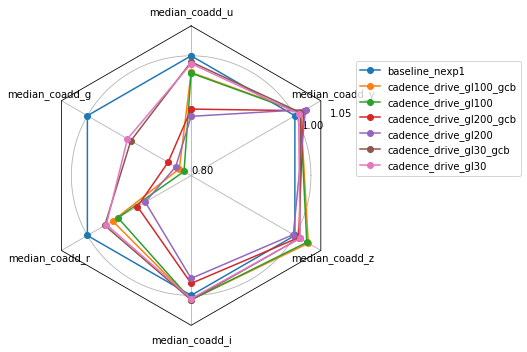

In [7]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp1',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.05], alpha=.1)
fig.tight_layout()

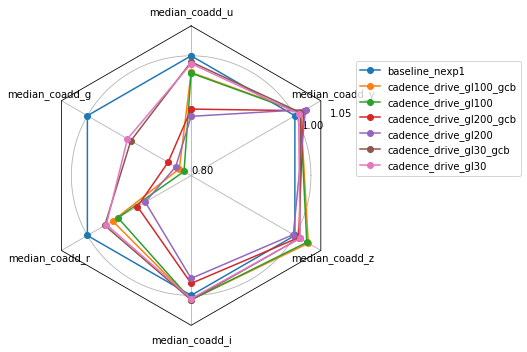

In [8]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp1',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.05], alpha=.1)
fig.tight_layout()

In [9]:
runs = ['baseline_nexp1'] + [name for name in data['runName'].values if 'twi' in name] 
runs

['baseline_nexp1',
 'twi_pairs_mixed_repeat',
 'twi_pairs_mixed',
 'twi_pairs_repeat',
 'twi_pairs']

In [10]:
runs = ['baseline_nexp1', 'baseline_nexp2'] + [name for name in data['runName'].values if 'u_long_ms' in name] 
runs

['baseline_nexp1',
 'baseline_nexp2',
 'u_long_ms_30',
 'u_long_ms_40',
 'u_long_ms_50',
 'u_long_ms_60']

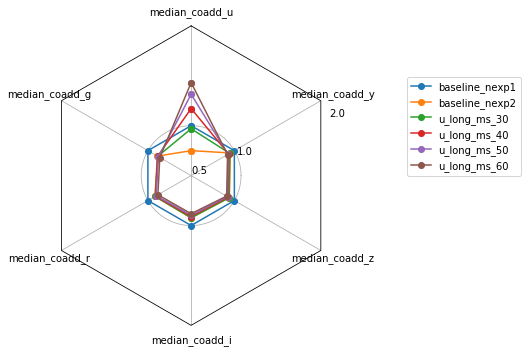

In [11]:

data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp1',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.5, 1.0, 2.])
fig.tight_layout()

In [12]:
data_normed = norm_df(data, runs, mag_cols, norm_run=None,
                      invert_cols=None, mag_cols='all')

In [13]:
data_normed

,runName,median_coadd_u,median_coadd_g,median_coadd_r,median_coadd_i,median_coadd_z,median_coadd_y
0,baseline_nexp1,25.866449,26.959707,26.953754,26.394735,25.663943,24.897462
1,baseline_nexp2,25.616321,26.849777,26.872119,26.317336,25.605405,24.850859
33,u_long_ms_30,25.835782,26.846043,26.870216,26.317803,25.604533,24.843259
34,u_long_ms_40,26.038019,26.847412,26.865088,26.304639,25.593560,24.831084
35,u_long_ms_50,26.181065,26.837547,26.858026,26.291746,25.585024,24.824449
36,u_long_ms_60,26.297914,26.821944,26.838445,26.276254,25.574604,24.818818


In [14]:
data_normed = norm_df(data, runs, nv_cols, norm_run=None,
                      invert_cols=None, mag_cols='all')
data_normed

,runName,median_Nvis_u,median_Nvis_g,median_Nvis_r,median_Nvis_i,median_Nvis_z,median_Nvis_y
0,baseline_nexp1,59.0,86.0,205.0,206.0,184.0,194.0
1,baseline_nexp2,55.0,79.0,189.0,190.0,170.0,180.0
33,u_long_ms_30,57.0,80.0,192.0,193.0,172.0,183.0
34,u_long_ms_40,55.0,79.0,189.0,190.0,170.0,179.0
35,u_long_ms_50,53.0,77.0,186.0,187.0,168.0,178.0
36,u_long_ms_60,51.0,76.0,183.0,184.0,165.0,175.0
